In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from scipy.stats import linregress
import statistics
import seaborn as sns
import plotly.express as px

In [35]:
#data = pd.read_excel("sample_data//Test.xlsx")
#data = pd.read_csv("sample_data//valeursfoncieres-2022.txt",sep="|")
#data = pd.read_excel("Test.xlsx")
data1 = pd.read_csv("/Users/juliensaleh/projet2023/GitHub/ProjetPython/valeursfoncieres-2022.txt",sep="|")
data2 = pd.read_csv("/Users/juliensaleh/projet2023/GitHub/ProjetPython/valeursfoncieres-2019.txt",sep="|")
#print(data1.columns)
data1.drop(['Identifiant de document','Reference document','1 Articles CGI','2 Articles CGI','3 Articles CGI','4 Articles CGI','5 Articles CGI','No disposition'],axis=1, inplace=True)
print(data1)

#print(data2.columns)
data2.drop(['Identifiant de document','Reference document','1 Articles CGI','2 Articles CGI','3 Articles CGI','4 Articles CGI','5 Articles CGI','No disposition'],axis=1, inplace=True)
#print(data2)

# Sélection de 10000 lignes aléatoires
data1_sample = data1.sample(n=100000, random_state=1)
data2_sample = data2.sample(n=100000, random_state=1)
data1_sample['Valeur fonciere'] = data1_sample['Valeur fonciere'].str.replace(',', '.').astype(float)
data2_sample['Valeur fonciere'] = data2_sample['Valeur fonciere'].str.replace(',', '.').astype(float)

/Users/juliensaleh/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (18,23,24,26,28,29,31,33,41) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/juliensaleh/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (18,23,24,26,28,31,33,41) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


        Date mutation Nature mutation Valeur fonciere  No voie B/T/Q  \
0          03/01/2022           Vente        55000,00     13.0   NaN   
1          03/01/2022           Vente       143000,00      NaN   NaN   
2          03/01/2022           Vente       143000,00      NaN   NaN   
3          03/01/2022           Vente       143000,00     98.0   NaN   
4          04/01/2022           Vente          300,00      NaN   NaN   
...               ...             ...             ...      ...   ...   
3803880    30/12/2022           Vente      3500000,00     19.0   NaN   
3803881    19/12/2022           Vente       525000,00      3.0   NaN   
3803882    19/12/2022           Vente       525000,00      3.0   NaN   
3803883    30/12/2022           Vente        15500,00     69.0   NaN   
3803884    21/11/2022           Vente        30000,00     48.0   NaN   

        Type de voie Code voie               Voie  Code postal  \
0                RUE      2280      DE LA LIBERTE       1000.0   
1  

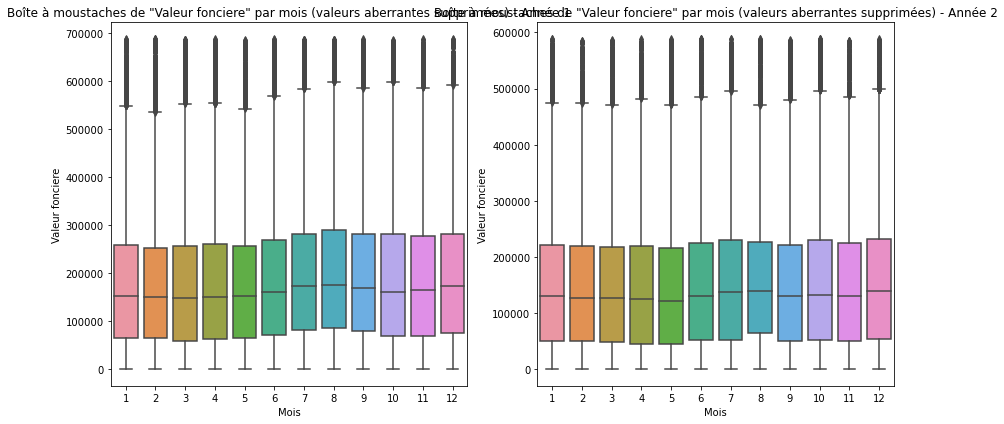

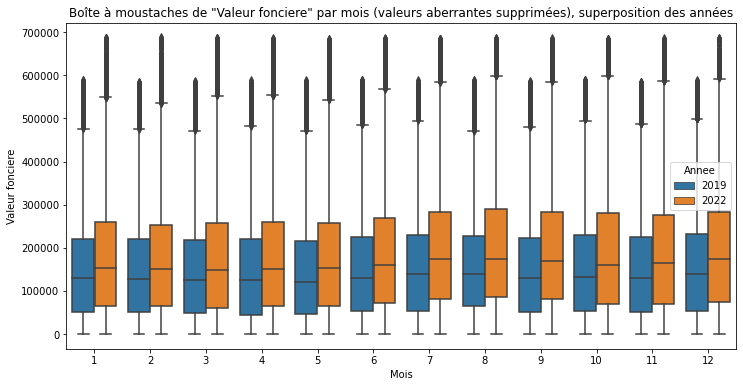

In [65]:
# Convertir 'Date mutation' en datetime
data1_sample['Date mutation'] = pd.to_datetime(data1_sample['Date mutation'], format='%d/%m/%Y')
data2_sample['Date mutation'] = pd.to_datetime(data2_sample['Date mutation'], format='%d/%m/%Y')

# Ajouter la colonne 'Mois'
data1_sample['Mois'] = data1_sample['Date mutation'].dt.month
data2_sample['Mois'] = data2_sample['Date mutation'].dt.month

# Calculer l'IQR pour 'Valeur fonciere' dans les deux jeux de données
Q1_1 = data1_sample['Valeur fonciere'].quantile(0.25)
Q3_1 = data1_sample['Valeur fonciere'].quantile(0.75)
IQR_1 = Q3_1 - Q1_1

Q1_2 = data2_sample['Valeur fonciere'].quantile(0.25)
Q3_2 = data2_sample['Valeur fonciere'].quantile(0.75)
IQR_2 = Q3_2 - Q1_2

# Définir les limites pour les valeurs aberrantes dans les deux jeux de données
limite_inferieure_1 = Q1_1 - 1.5 * IQR_1
limite_superieure_1 = Q3_1 + 1.5 * IQR_1

limite_inferieure_2 = Q1_2 - 1.5 * IQR_2
limite_superieure_2 = Q3_2 + 1.5 * IQR_2

# Filtrer les données
donnees_filtrees_1 = data1_sample[(data1_sample['Valeur fonciere'] >= limite_inferieure_1) & (data1_sample['Valeur fonciere'] <= limite_superieure_1)]
donnees_filtrees_2 = data2_sample[(data2_sample['Valeur fonciere'] >= limite_inferieure_2) & (data2_sample['Valeur fonciere'] <= limite_superieure_2)]

# Créer les boîtes à moustaches
plt.figure(figsize=(12,6))

# Boîte à moustaches pour la première année
plt.subplot(1, 2, 1)
sns.boxplot(x='Mois', y='Valeur fonciere', data=donnees_filtrees_1)
plt.title('Boîte à moustaches de "Valeur fonciere" par mois (valeurs aberrantes supprimées) - Année 1')

# Boîte à moustaches pour la deuxième année
plt.subplot(1, 2, 2)
sns.boxplot(x='Mois', y='Valeur fonciere', data=donnees_filtrees_2)
plt.title('Boîte à moustaches de "Valeur fonciere" par mois (valeurs aberrantes supprimées) - Année 2')

plt.tight_layout()
plt.show()

# Concaténer les données filtrées
donnees_filtrees = pd.concat([donnees_filtrees_1, donnees_filtrees_2])

# Créer une nouvelle colonne 'Année' dans les données filtrées
donnees_filtrees['Annee'] = donnees_filtrees['Date mutation'].dt.year

# Créer la boîte à moustaches
plt.figure(figsize=(12,6))
sns.boxplot(x='Mois', y='Valeur fonciere', hue='Annee', data=donnees_filtrees)
plt.title('Boîte à moustaches de "Valeur fonciere" par mois (valeurs aberrantes supprimées), superposition des années')
plt.show()


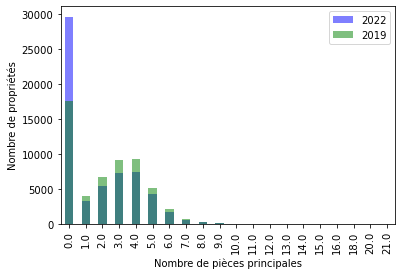

In [37]:
#Diagramme en barres du Nombre de Pièces Principales : Cela peut montrer la distribution du nombre de pièces parmi les propriétés.
data1_sample['Nombre pieces principales'].value_counts().sort_index().plot(kind='bar', color='blue', alpha=0.5, label="2022")
data2_sample['Nombre pieces principales'].value_counts().sort_index().plot(kind='bar', color='green', alpha=0.5, label="2019")
plt.xlabel('Nombre de pièces principales')
plt.ylabel('Nombre de propriétés')
plt.legend(loc='upper right')
plt.show()


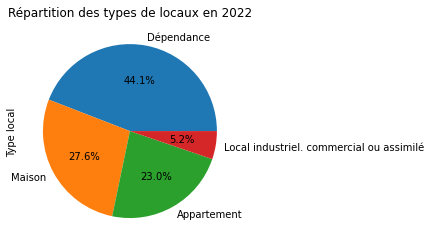

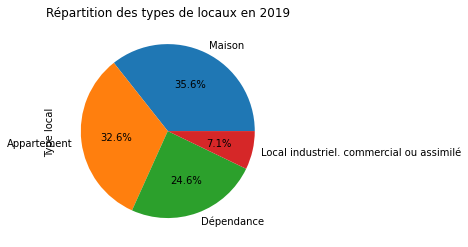

In [38]:
#Diagramme en Camembert du Type Local : Cela peut montrer la répartition des types de propriétés (appartement, maison, etc.) dans l'ensemble de données.
data1_sample['Type local'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Répartition des types de locaux en 2022')
plt.show()

data2_sample['Type local'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Répartition des types de locaux en 2019')


plt.show()

/var/folders/s_/3g6sdr6951944m7847cc24180000gn/T/ipykernel_4874/4288423097.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrée['Mois'] = data_filtrée['Date mutation'].dt.month


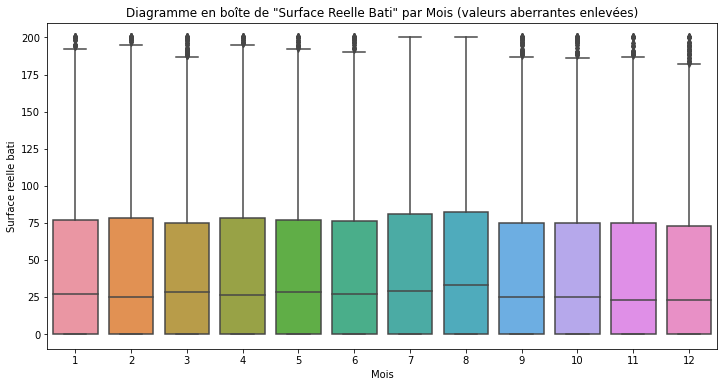

/var/folders/s_/3g6sdr6951944m7847cc24180000gn/T/ipykernel_4874/4288423097.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrée['Mois'] = data_filtrée['Date mutation'].dt.month


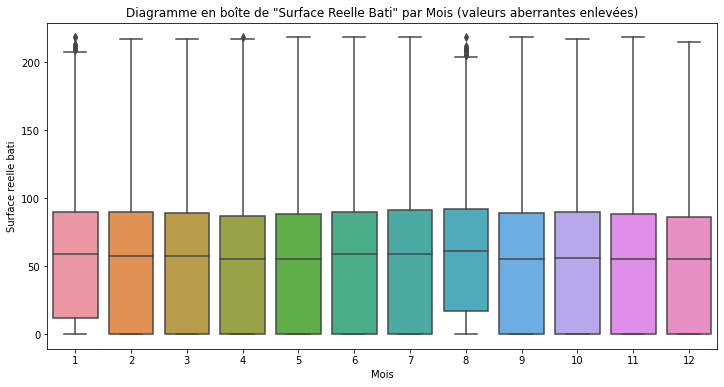

In [55]:
# Convertis 'Date mutation' en datetime
data1_sample['Date mutation'] = pd.to_datetime(data1_sample['Date mutation'], format='%d/%m/%Y')

# Calcule l'IQR pour 'Surface reelle bati'
Q1 = data1_sample['Surface reelle bati'].quantile(0.25)
Q3 = data1_sample['Surface reelle bati'].quantile(0.75)
IQR = Q3 - Q1

# Définis les limites pour les valeurs aberrantes
limite_inférieure = Q1 - 1.5 * IQR
limite_supérieure = Q3 + 1.5 * IQR

# Filtre les données
data_filtrée = data1_sample[(data1_sample['Surface reelle bati'] >= limite_inférieure) & (data1_sample['Surface reelle bati'] <= limite_supérieure)]

# Extrait le mois de la colonne 'Date mutation'
data_filtrée['Mois'] = data_filtrée['Date mutation'].dt.month

# Crée le diagramme en boîte
plt.figure(figsize=(12, 6))
sns.boxplot(x='Mois', y='Surface reelle bati', data=data_filtrée)
plt.title('Diagramme en boîte de "Surface Reelle Bati" par Mois (valeurs aberrantes enlevées)')
plt.show()


# Convertis 'Date mutation' en datetime
data2_sample['Date mutation'] = pd.to_datetime(data2_sample['Date mutation'], format='%d/%m/%Y')

# Calcule l'IQR pour 'Surface reelle bati'
Q1 = data2_sample['Surface reelle bati'].quantile(0.25)
Q3 = data2_sample['Surface reelle bati'].quantile(0.75)
IQR = Q3 - Q1

# Définis les limites pour les valeurs aberrantes
limite_inférieure = Q1 - 1.5 * IQR
limite_supérieure = Q3 + 1.5 * IQR

# Filtre les données
data_filtrée = data2_sample[(data2_sample['Surface reelle bati'] >= limite_inférieure) & (data2_sample['Surface reelle bati'] <= limite_supérieure)]

# Extrait le mois de la colonne 'Date mutation'
data_filtrée['Mois'] = data_filtrée['Date mutation'].dt.month

# Crée le diagramme en boîte
plt.figure(figsize=(12, 6))
sns.boxplot(x='Mois', y='Surface reelle bati', data=data_filtrée)
plt.title('Diagramme en boîte de "Surface Reelle Bati" par Mois (valeurs aberrantes enlevées)')
plt.show()



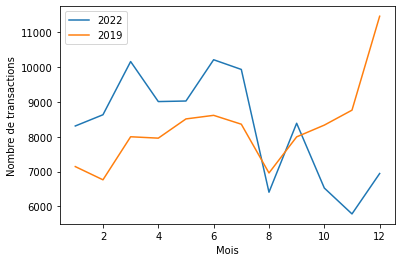

In [40]:
# Convert 'Date mutation' column to datetime type
data1_sample['Date mutation'] = pd.to_datetime(data1_sample['Date mutation'])
data2_sample['Date mutation'] = pd.to_datetime(data2_sample['Date mutation'])

# Extraire le mois de la colonne 'Date mutation'
data1_sample['Month'] = data1_sample['Date mutation'].dt.month
data2_sample['Month'] = data2_sample['Date mutation'].dt.month

# Tracer les courbes du nombre de transactions par mois
data1_sample.groupby('Month')['Valeur fonciere'].count().plot(kind='line', label='2022')
data2_sample.groupby('Month')['Valeur fonciere'].count().plot(kind='line', label='2019')
plt.xlabel('Mois')
plt.ylabel('Nombre de transactions')
plt.legend()
plt.show()

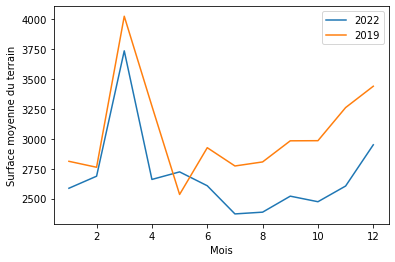

In [41]:
data1_sample['Month'] = data1_sample['Date mutation'].dt.month
data2_sample['Month'] = data2_sample['Date mutation'].dt.month

data1_sample.groupby('Month')['Surface terrain'].mean().plot(kind='line', label='2022')
data2_sample.groupby('Month')['Surface terrain'].mean().plot(kind='line', label='2019')
plt.xlabel('Mois')
plt.ylabel('Surface moyenne du terrain')
plt.legend()
plt.show()

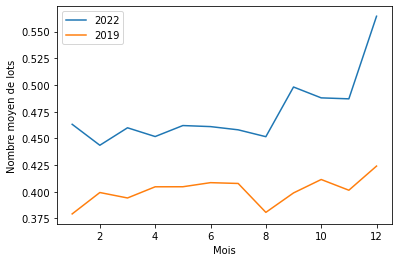

In [42]:
data1_sample['Month'] = data1_sample['Date mutation'].dt.month
data2_sample['Month'] = data2_sample['Date mutation'].dt.month

data1_sample.groupby('Month')['Nombre de lots'].mean().plot(kind='line', label='2022')
data2_sample.groupby('Month')['Nombre de lots'].mean().plot(kind='line', label='2019')
plt.xlabel('Mois')
plt.ylabel('Nombre moyen de lots')
plt.legend()
plt.show()


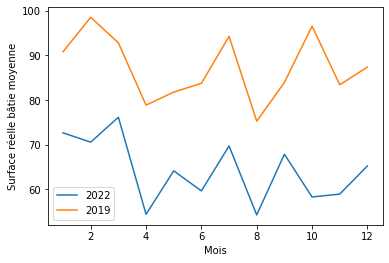

In [43]:
data1_sample['Month'] = data1_sample['Date mutation'].dt.month
data2_sample['Month'] = data2_sample['Date mutation'].dt.month

data1_sample.groupby('Month')['Surface reelle bati'].mean().plot(kind='line', label='2022')
data2_sample.groupby('Month')['Surface reelle bati'].mean().plot(kind='line', label='2019')
plt.xlabel('Mois')
plt.ylabel('Surface réelle bâtie moyenne')
plt.legend()
plt.show()

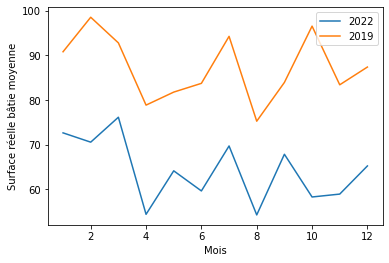

In [44]:
data1_sample['Month'] = data1_sample['Date mutation'].dt.month
data2_sample['Month'] = data2_sample['Date mutation'].dt.month

data1_sample.groupby('Month')['Surface reelle bati'].mean().plot(kind='line', label='2022')
data2_sample.groupby('Month')['Surface reelle bati'].mean().plot(kind='line', label='2019')
plt.xlabel('Mois')
plt.ylabel('Surface réelle bâtie moyenne')
plt.legend(loc='upper right')
plt.show()

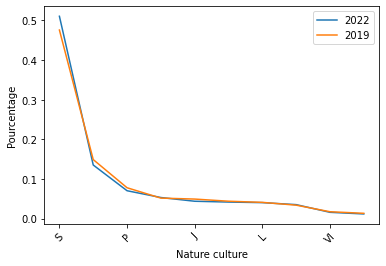

In [45]:
# 2022 data
nature_culture_2022 = data1_sample['Nature culture'].value_counts(normalize=True).sort_values(ascending=False).head(10)
nature_culture_2022.plot(kind='line', label='2022')

# 2019 data
nature_culture_2019 = data2_sample['Nature culture'].value_counts(normalize=True).sort_values(ascending=False).head(10)
nature_culture_2019.plot(kind='line', label='2019')

plt.xlabel('Nature culture')
plt.ylabel('Pourcentage')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()


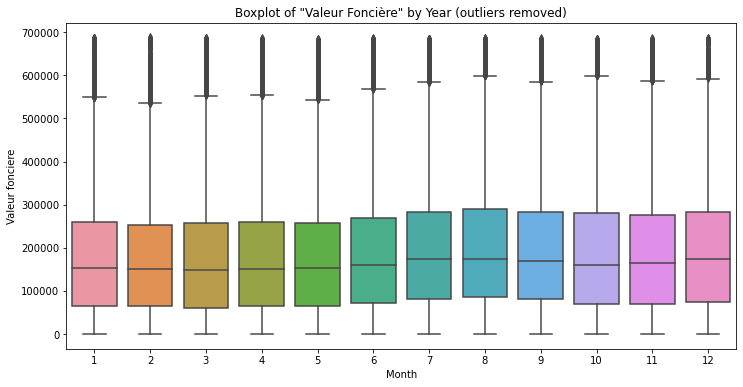

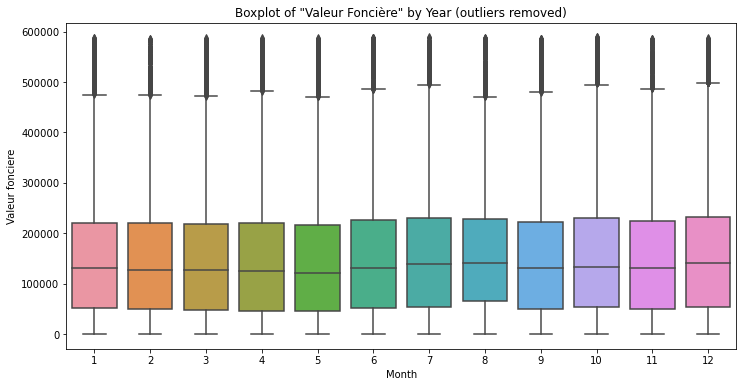

In [73]:
# Convertit 'Valeur fonciere' de string à float
#data1_sample['Valeur fonciere'] = data1_sample['Valeur fonciere'].str.replace(',', '.').astype(float)

Q1 = data1_sample['Valeur fonciere'].quantile(0.25)
Q3 = data1_sample['Valeur fonciere'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

filtered_data = data1_sample[(data1_sample['Valeur fonciere'] >= lower_limit) & (data1_sample['Valeur fonciere'] <= upper_limit)]

# Plot
plt.figure(figsize=(12,6))
sns.boxplot(x='Month', y='Valeur fonciere', data=filtered_data)
plt.title('Boxplot of "Valeur Foncière" by Year (outliers removed)')
plt.show()

Q1 = data2_sample['Valeur fonciere'].quantile(0.25)
Q3 = data2_sample['Valeur fonciere'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

#Filtration
filtered_data = data2_sample[(data2_sample['Valeur fonciere'] >= lower_limit) & (data2_sample['Valeur fonciere'] <= upper_limit)]

# Plot
plt.figure(figsize=(12,6))
sns.boxplot(x='Month', y='Valeur fonciere', data=filtered_data)
plt.title('Boxplot of "Valeur Foncière" by Year (outliers removed)')
plt.show()

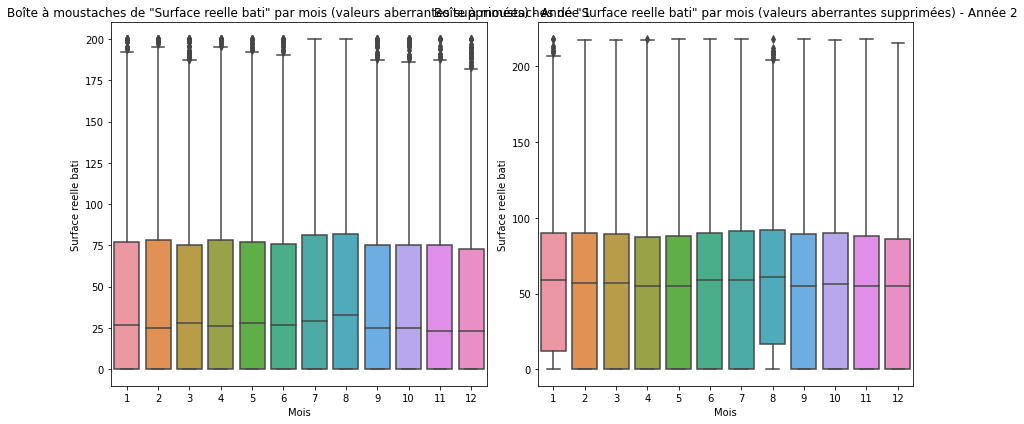

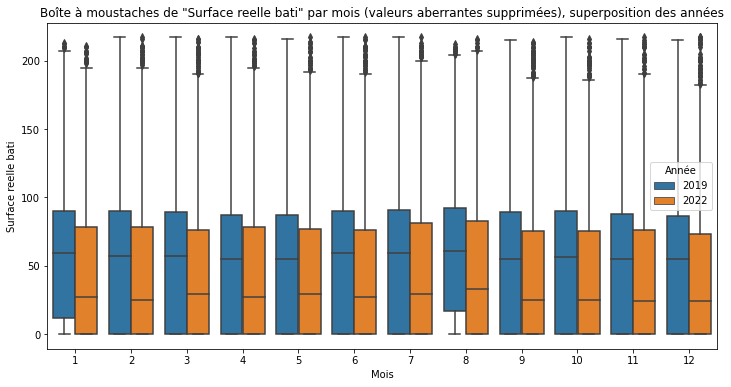

In [67]:
# Convertir 'Date mutation' en datetime
data1_sample['Date mutation'] = pd.to_datetime(data1_sample['Date mutation'], format='%d/%m/%Y')
data2_sample['Date mutation'] = pd.to_datetime(data2_sample['Date mutation'], format='%d/%m/%Y')

# Ajouter la colonne 'Mois'
data1_sample['Mois'] = data1_sample['Date mutation'].dt.month
data2_sample['Mois'] = data2_sample['Date mutation'].dt.month

# Calculer l'IQR pour 'Surface reelle bati' dans les deux jeux de données
Q1_1 = data1_sample['Surface reelle bati'].quantile(0.25)
Q3_1 = data1_sample['Surface reelle bati'].quantile(0.75)
IQR_1 = Q3_1 - Q1_1

Q1_2 = data2_sample['Surface reelle bati'].quantile(0.25)
Q3_2 = data2_sample['Surface reelle bati'].quantile(0.75)
IQR_2 = Q3_2 - Q1_2

# Définir les limites pour les valeurs aberrantes dans les deux jeux de données
limite_inferieure_1 = Q1_1 - 1.5 * IQR_1
limite_superieure_1 = Q3_1 + 1.5 * IQR_1

limite_inferieure_2 = Q1_2 - 1.5 * IQR_2
limite_superieure_2 = Q3_2 + 1.5 * IQR_2

# Filtrer les données
donnees_filtrees_1 = data1_sample[(data1_sample['Surface reelle bati'] >= limite_inferieure_1) & (data1_sample['Surface reelle bati'] <= limite_superieure_1)]
donnees_filtrees_2 = data2_sample[(data2_sample['Surface reelle bati'] >= limite_inferieure_2) & (data2_sample['Surface reelle bati'] <= limite_superieure_2)]

# Créer les boîtes à moustaches
plt.figure(figsize=(12,6))

# Boîte à moustaches pour la première année
plt.subplot(1, 2, 1)
sns.boxplot(x='Mois', y='Surface reelle bati', data=donnees_filtrees_1)
plt.title('Boîte à moustaches de "Surface reelle bati" par mois (valeurs aberrantes supprimées) - Année 1')

# Boîte à moustaches pour la deuxième année
plt.subplot(1, 2, 2)
sns.boxplot(x='Mois', y='Surface reelle bati', data=donnees_filtrees_2)
plt.title('Boîte à moustaches de "Surface reelle bati" par mois (valeurs aberrantes supprimées) - Année 2')

plt.tight_layout()
plt.show()

# Convertir 'Date mutation' en datetime
data1_sample['Date mutation'] = pd.to_datetime(data1_sample['Date mutation'], format='%d/%m/%Y')
data2_sample['Date mutation'] = pd.to_datetime(data2_sample['Date mutation'], format='%d/%m/%Y')

# Ajouter la colonne 'Mois'
data1_sample['Mois'] = data1_sample['Date mutation'].dt.month
data2_sample['Mois'] = data2_sample['Date mutation'].dt.month

# Ajouter une colonne 'Année'
data1_sample['Année'] = data1_sample['Date mutation'].dt.year
data2_sample['Année'] = data2_sample['Date mutation'].dt.year

# Concaténer les deux ensembles de données
donnees_concatenees = pd.concat([data1_sample, data2_sample])

# Calculer l'IQR pour 'Surface reelle bati'
Q1 = donnees_concatenees['Surface reelle bati'].quantile(0.25)
Q3 = donnees_concatenees['Surface reelle bati'].quantile(0.75)
IQR = Q3 - Q1

# Définir les limites pour les valeurs aberrantes
limite_inferieure = Q1 - 1.5 * IQR
limite_superieure = Q3 + 1.5 * IQR

# Filtrer les données
donnees_filtrees = donnees_concatenees[(donnees_concatenees['Surface reelle bati'] >= limite_inferieure) & (donnees_concatenees['Surface reelle bati'] <= limite_superieure)]

# Créer la boîte à moustaches
plt.figure(figsize=(12,6))
sns.boxplot(x='Mois', y='Surface reelle bati', hue='Année', data=donnees_filtrees)
plt.title('Boîte à moustaches de "Surface reelle bati" par mois (valeurs aberrantes supprimées), superposition des années')
plt.show()


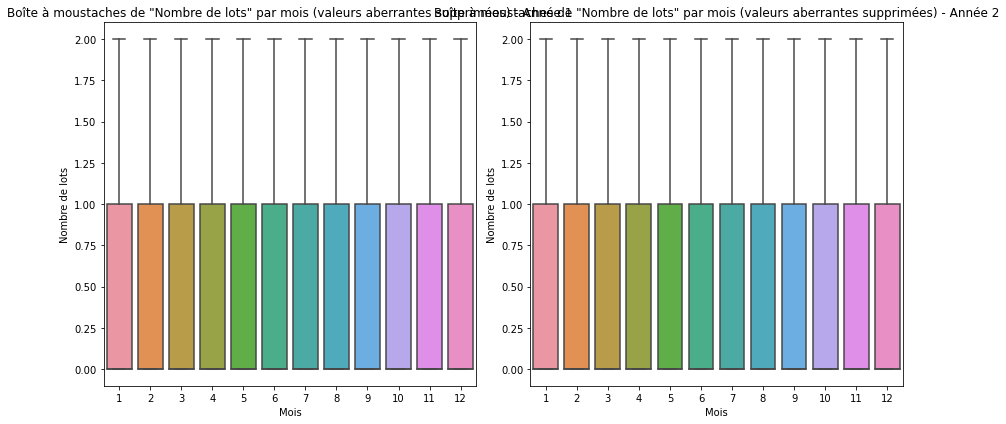

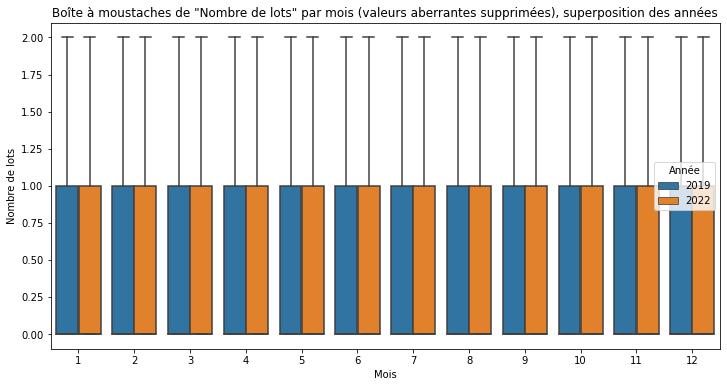

In [68]:
# On convertit 'Date mutation' en datetime
data1_sample['Date mutation'] = pd.to_datetime(data1_sample['Date mutation'], format='%d/%m/%Y')
data2_sample['Date mutation'] = pd.to_datetime(data2_sample['Date mutation'], format='%d/%m/%Y')

# On ajoute la colonne 'Mois'
data1_sample['Mois'] = data1_sample['Date mutation'].dt.month
data2_sample['Mois'] = data2_sample['Date mutation'].dt.month

# On calcule l'IQR pour 'Nombre de lots' dans les deux jeux de données
Q1_1 = data1_sample['Nombre de lots'].quantile(0.25)
Q3_1 = data1_sample['Nombre de lots'].quantile(0.75)
IQR_1 = Q3_1 - Q1_1

Q1_2 = data2_sample['Nombre de lots'].quantile(0.25)
Q3_2 = data2_sample['Nombre de lots'].quantile(0.75)
IQR_2 = Q3_2 - Q1_2

# On définit les limites pour les valeurs aberrantes dans les deux jeux de données
limite_inferieure_1 = Q1_1 - 1.5 * IQR_1
limite_superieure_1 = Q3_1 + 1.5 * IQR_1

limite_inferieure_2 = Q1_2 - 1.5 * IQR_2
limite_superieure_2 = Q3_2 + 1.5 * IQR_2

# On filtre les données
donnees_filtrees_1 = data1_sample[(data1_sample['Nombre de lots'] >= limite_inferieure_1) & (data1_sample['Nombre de lots'] <= limite_superieure_1)]
donnees_filtrees_2 = data2_sample[(data2_sample['Nombre de lots'] >= limite_inferieure_2) & (data2_sample['Nombre de lots'] <= limite_superieure_2)]

# On crée les boîtes à moustaches
plt.figure(figsize=(12,6))

# Boîte à moustaches pour la première année
plt.subplot(1, 2, 1)
sns.boxplot(x='Mois', y='Nombre de lots', data=donnees_filtrees_1)
plt.title('Boîte à moustaches de "Nombre de lots" par mois (valeurs aberrantes supprimées) - Année 1')

# Boîte à moustaches pour la deuxième année
plt.subplot(1, 2, 2)
sns.boxplot(x='Mois', y='Nombre de lots', data=donnees_filtrees_2)
plt.title('Boîte à moustaches de "Nombre de lots" par mois (valeurs aberrantes supprimées) - Année 2')

plt.tight_layout()
plt.show()

# Convertir 'Date mutation' en datetime
data1_sample['Date mutation'] = pd.to_datetime(data1_sample['Date mutation'], format='%d/%m/%Y')
data2_sample['Date mutation'] = pd.to_datetime(data2_sample['Date mutation'], format='%d/%m/%Y')

# Ajouter la colonne 'Mois'
data1_sample['Mois'] = data1_sample['Date mutation'].dt.month
data2_sample['Mois'] = data2_sample['Date mutation'].dt.month

# Ajouter une colonne 'Année'
data1_sample['Année'] = data1_sample['Date mutation'].dt.year
data2_sample['Année'] = data2_sample['Date mutation'].dt.year

# Concaténer les deux ensembles de données
donnees_concatenees = pd.concat([data1_sample, data2_sample])

# Calculer l'IQR pour 'Nombre de lots'
Q1 = donnees_concatenees['Nombre de lots'].quantile(0.25)
Q3 = donnees_concatenees['Nombre de lots'].quantile(0.75)
IQR = Q3 - Q1

# Définir les limites pour les valeurs aberrantes
limite_inferieure = Q1 - 1.5 * IQR
limite_superieure = Q3 + 1.5 * IQR

# Filtrer les données
donnees_filtrees = donnees_concatenees[(donnees_concatenees['Nombre de lots'] >= limite_inferieure) & (donnees_concatenees['Nombre de lots'] <= limite_superieure)]

# Créer la boîte à moustaches
plt.figure(figsize=(12,6))
sns.boxplot(x='Mois', y='Nombre de lots', hue='Année', data=donnees_filtrees)
plt.title('Boîte à moustaches de "Nombre de lots" par mois (valeurs aberrantes supprimées), superposition des années')
plt.show()


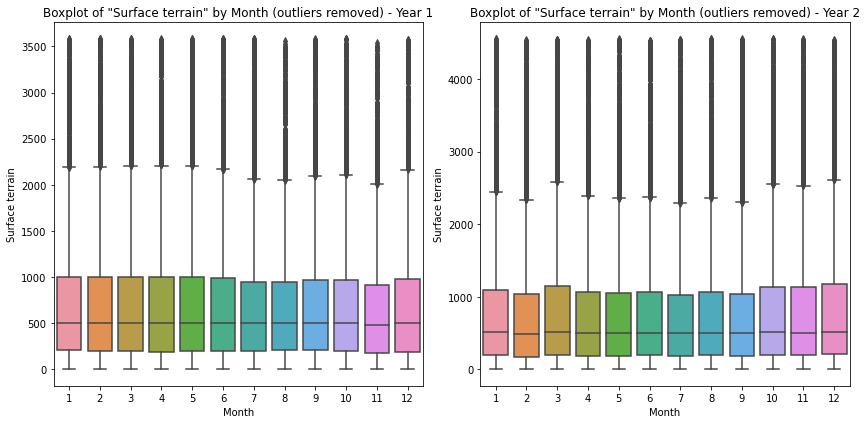

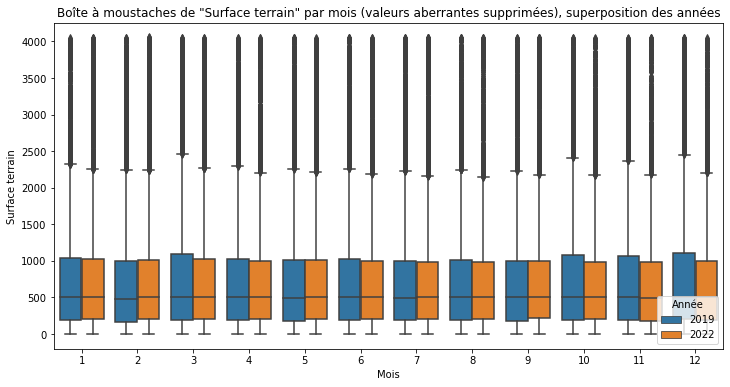

In [70]:
# On convertit 'Date mutation' en datetime
data1_sample['Date mutation'] = pd.to_datetime(data1_sample['Date mutation'], format='%d/%m/%Y')
data2_sample['Date mutation'] = pd.to_datetime(data2_sample['Date mutation'], format='%d/%m/%Y')

# On ajoute la colonne 'Mois'
data1_sample['Month'] = data1_sample['Date mutation'].dt.month
data2_sample['Month'] = data2_sample['Date mutation'].dt.month

# On calcule l'IQR pour 'Nombre de lots' dans les deux jeux de données
Q1_1 = data1_sample['Surface terrain'].quantile(0.25)
Q3_1 = data1_sample['Surface terrain'].quantile(0.75)
IQR_1 = Q3_1 - Q1_1

Q1_2 = data2_sample['Surface terrain'].quantile(0.25)
Q3_2 = data2_sample['Surface terrain'].quantile(0.75)
IQR_2 = Q3_2 - Q1_2

# On définit les limites pour les valeurs aberrantes dans les deux jeux de données
lower_limit_1 = Q1_1 - 1.5 * IQR_1
upper_limit_1 = Q3_1 + 1.5 * IQR_1

lower_limit_2 = Q1_2 - 1.5 * IQR_2
upper_limit_2 = Q3_2 + 1.5 * IQR_2

# On filtre les données
filtered_data_1 = data1_sample[(data1_sample['Surface terrain'] >= lower_limit_1) & (data1_sample['Surface terrain'] <= upper_limit_1)]
filtered_data_2 = data2_sample[(data2_sample['Surface terrain'] >= lower_limit_2) & (data2_sample['Surface terrain'] <= upper_limit_2)]

# On crée les boîtes à moustaches
plt.figure(figsize=(12,6))

# Boîte à moustaches pour la prémière année
plt.subplot(1, 2, 1)
sns.boxplot(x='Month', y='Surface terrain', data=filtered_data_1)
plt.title('Boxplot of "Surface terrain" by Month (outliers removed) - Year 1')

# Boîte à moustaches pour la deuxième année
plt.subplot(1, 2, 2)
sns.boxplot(x='Month', y='Surface terrain', data=filtered_data_2)
plt.title('Boxplot of "Surface terrain" by Month (outliers removed) - Year 2')

plt.tight_layout()
plt.show()

# Convertir 'Date mutation' en datetime
data1_sample['Date mutation'] = pd.to_datetime(data1_sample['Date mutation'], format='%d/%m/%Y')
data2_sample['Date mutation'] = pd.to_datetime(data2_sample['Date mutation'], format='%d/%m/%Y')

# Ajouter la colonne 'Mois'
data1_sample['Mois'] = data1_sample['Date mutation'].dt.month
data2_sample['Mois'] = data2_sample['Date mutation'].dt.month

# Ajouter une colonne 'Année'
data1_sample['Année'] = data1_sample['Date mutation'].dt.year
data2_sample['Année'] = data2_sample['Date mutation'].dt.year

# Concaténer les deux ensembles de données
donnees_concatenees = pd.concat([data1_sample, data2_sample])

# Calculer l'IQR pour 'Surface terrain'
Q1 = donnees_concatenees['Surface terrain'].quantile(0.25)
Q3 = donnees_concatenees['Surface terrain'].quantile(0.75)
IQR = Q3 - Q1

# Définir les limites pour les valeurs aberrantes
limite_inferieure = Q1 - 1.5 * IQR
limite_superieure = Q3 + 1.5 * IQR

# Filtrer les données
donnees_filtrees = donnees_concatenees[(donnees_concatenees['Surface terrain'] >= limite_inferieure) & (donnees_concatenees['Surface terrain'] <= limite_superieure)]

# Créer la boîte à moustaches
plt.figure(figsize=(12,6))
sns.boxplot(x='Mois', y='Surface terrain', hue='Année', data=donnees_filtrees)
plt.title('Boîte à moustaches de "Surface terrain" par mois (valeurs aberrantes supprimées), superposition des années')
plt.show()

